In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skewnorm

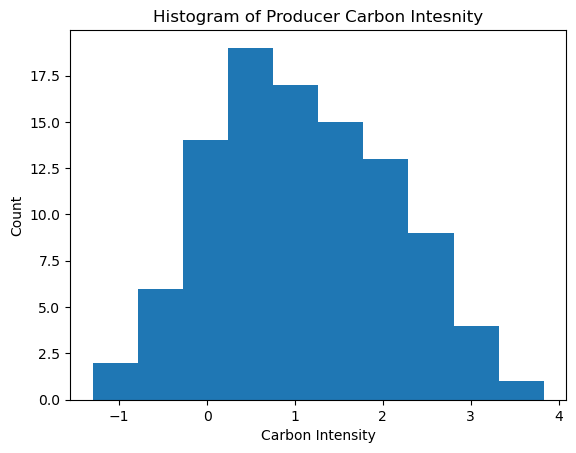

In [17]:
mu_ci = 1 # average tonnes of CO2e per unit produced
size = 100 # number of producers
std = 1 # standard deviations of distribution from mean CI
industry = np.random.normal(size=size, scale=std, loc=mu_ci)

# Show the distribution
plt.hist(industry)
plt.title('Histogram of Producer Carbon Intesnity')
plt.ylabel('Count')
plt.xlabel('Carbon Intensity')
plt.show()

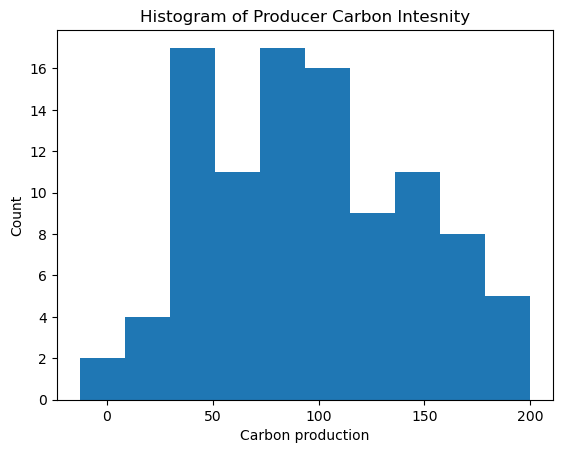

In [34]:
# Now add in how much is being produced by each producer
mu_prod = 100 # Average Mbbl produced a year
std = 50 # Distribution of average
production = np.random.normal(size=size, scale=std, loc=mu_prod)

# Show the distribution
plt.hist(production)
plt.title('Histogram of Producer Carbon Intesnity')
plt.ylabel('Count')
plt.xlabel('Carbon production')
plt.show()

In [44]:
# Create df of producers
df = pd.DataFrame({'Producer':['producer_' + str(i + 1) for i in range(size)],'Carbon Intensity':industry, 'Annual Production (Mbbl)':production})
df[df['Annual Production (Mbbl)'] < 0] = df[df['Annual Production (Mbbl)'] < 0] * -1 # Can't have negative production
df['Annual Emissions (tonne CO2e)'] = df['Carbon Intensity'] * df['Annual Production (Mbbl)']

In [45]:
# Apply the OBPS rate to each producer
obps = 0.8 # Percentage of average emissions intensity (mu) covered
carbon_price = 170 # $ per tonne CO2e produced if above average CI
credit_priice = 170 # $ per tonne CO2e produced recieved in the form of credits if below average CI

if df['Carbon Intensity'] < 0:
    df['Cost/Credit'] = -1 * carbon_price * df['Annual Emissions (tonne CO2e)']


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().